In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
dataDir='.'
dataType='val2014'

instances_annFile = '{}/annotations/instances_{}.json'.format(dataDir,dataType)
print(instances_annFile)

./annotations/instances_val2014.json


In [3]:
# initialize COCO api for instance annotations
coco = COCO(instances_annFile)

loading annotations into memory...
Done (t=4.27s)
creating index...
index created!


In [4]:
# list of python dictionaries
cats = coco.loadCats(coco.getCatIds())
print(cats[0])

nms = [cat['name'] for cat in cats]
print('\nCOCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

{'supercategory': 'person', 'id': 1, 'name': 'person'}

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
indoor electronic appliance accessory vehicle outdoor kitchen sports furniture food person animal


In [5]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds);
print(imgIds)
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

[438915, 209028, 549220, 500100, 231240, 255209, 372874, 28842, 353644, 241837, 279278, 282768, 360595, 366484, 45175, 449560, 493020, 547421, 324158]


http://images.cocodataset.org/val2014/COCO_val2014_000000255209.jpg


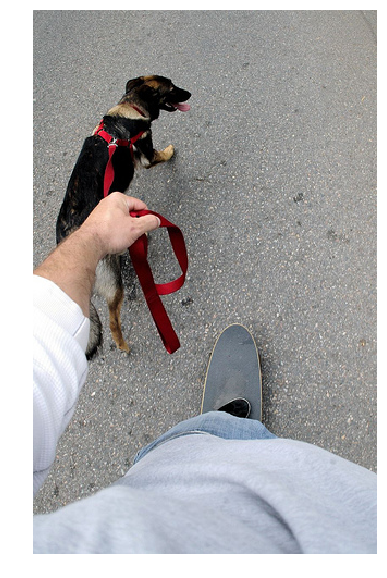

In [6]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
img_path = ''
print(img['coco_url'])
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

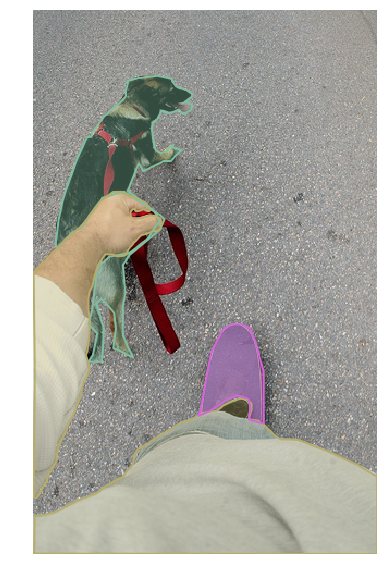

In [7]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [8]:
captions_annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
print(captions_annFile)

./annotations/captions_val2014.json


In [9]:
# initialize COCO api for caption annotations
coco_caps=COCO(captions_annFile)

loading annotations into memory...
Done (t=0.27s)
creating index...
index created!


The dog is dwarfed by his human walker.
A person holding a dog by a red leash.
Small dog with red harness being held by a man with grey shoes.
A man takes a picture of his dog on a leash.
A man walking his dog with a red leash.


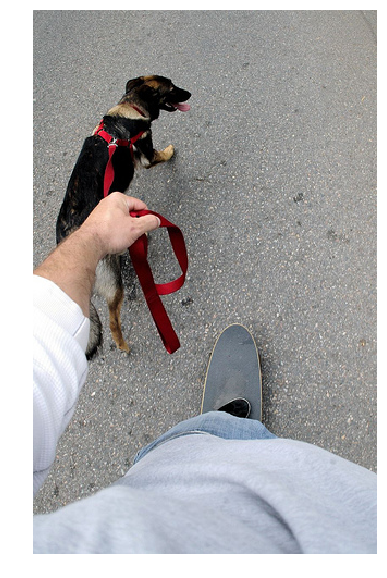

In [10]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()